In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting
import math
from prettytable import PrettyTable
import missingno

The objective is to generate  a robust model for identifying which bank customers will churn (i.e. end their relationship with the bank). 

The following steps will be followed:

-- Perform EDA

-- Preprocess the data & feature engineering

-- Evaluate baseline models

-- Hyperparameter tuning 


In [3]:
data = pd.read_csv("ChurnPrediction/churn-prediction.csv")

data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


The first step is to get some basic descrptive statics and identify which variables are continous and categorical 

In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Checking for missing values -- no values are missing

In [5]:
data.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

We have both caterorigal and continous variabels (float64 and object). A futher investigation of the features labeled as "int64" needs to be done to understand the true data type. Also, Months_on_book has been included, since its counting number of months. Client num and customer age will be left out of this analysis

In [6]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book              float64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
data_ = data.iloc[:,3:]

data_.select_dtypes('int')

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,3,5,1,3,777,1144,42
1,5,6,1,2,864,1291,33
2,3,4,1,0,0,1887,20
3,4,3,4,1,2517,1171,20
4,3,5,1,0,0,816,28
...,...,...,...,...,...,...,...
10122,2,3,2,3,1851,15476,117
10123,2,4,2,3,2186,8764,69
10124,1,5,3,4,0,10291,60
10125,2,4,3,3,0,8395,62


In [8]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
data = data.replace('Unknown', np.nan)
data = data.replace('unknown', np.nan)
data = data.replace('Unknown ', np.nan)

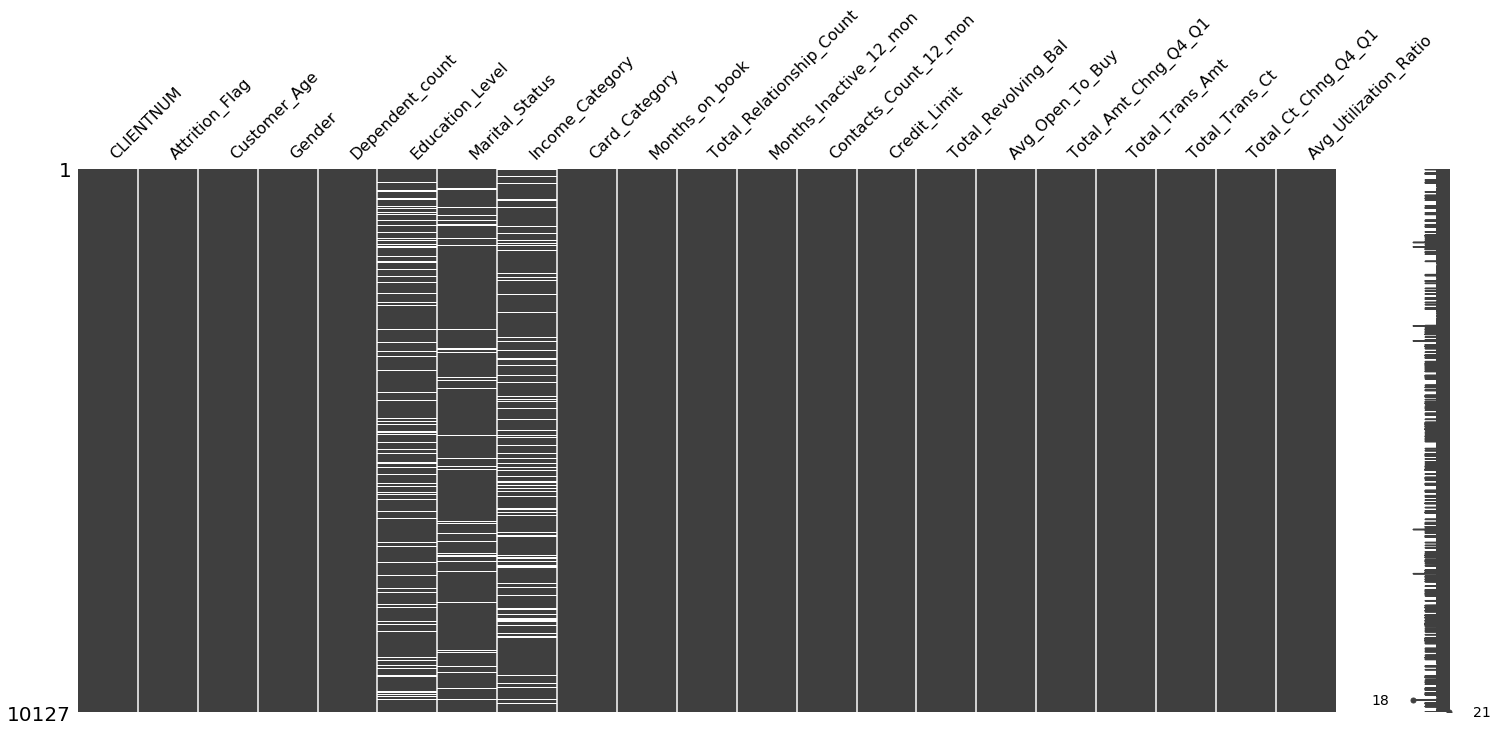

In [12]:
missingno.matrix(data)

In [13]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df[5:8]

,column_name,percent_missing
Education_Level,Education_Level,14.999506
Marital_Status,Marital_Status,7.396070
Income_Category,Income_Category,10.980547


Conclusion :In this case missing value hide under the name unknown, in Income_category and Marital_status we will fill with the most frequent variable, but for the education_level case , because it is almost 15% , we decided to let it as a category on it s own and label encode it.

From the below graphs we can see that Dependent_count Total_Relationship_Count,Months_Inactive_12_mon and Contacts_Count_12_mon are technically categorical variables as well

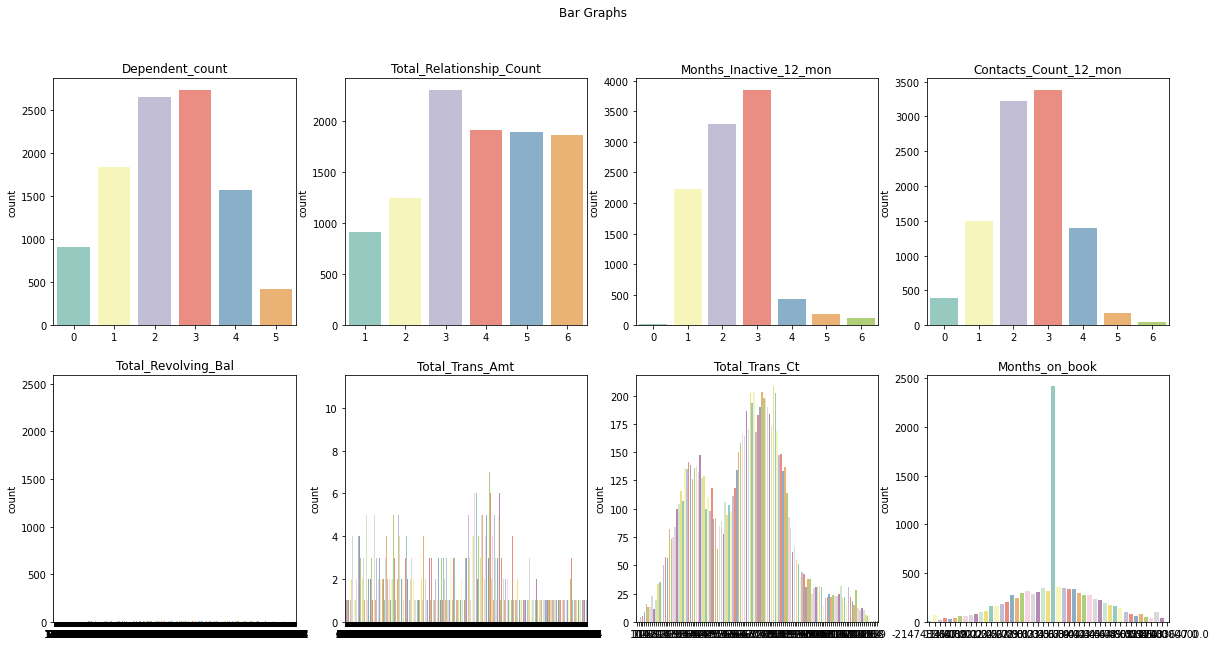

In [6]:
columns_name = list(data_.select_dtypes('int').columns) + ['Months_on_book']
int_bool = data_.dtypes == "int"

figure, axes = plt.subplots(nrows=2, ncols=4, figsize = (20,10))
figure.suptitle('Bar Graphs')
axes = axes.flatten()
for ax, catplot in zip(axes,columns_name):
  sns.countplot(x = catplot, data = data_, ax = ax, palette="Set3").set(title =catplot,xlabel='')

plt.show()



Now that we know which variables are continous and categorical we can peroform EDA on them

In [7]:
cat_features = list(data.select_dtypes('object').columns) + ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
cat_features = cat_features[1:]
print('Categorical features',cat_features)
print("")

continous_features=list(data.select_dtypes('float').columns) + ['Total_Revolving_Bal','Total_Trans_Amt',"Total_Trans_Ct"]

print("Continous Features", continous_features)

Categorical features ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

Continous Features ['Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']



# Continous Features Analysis 

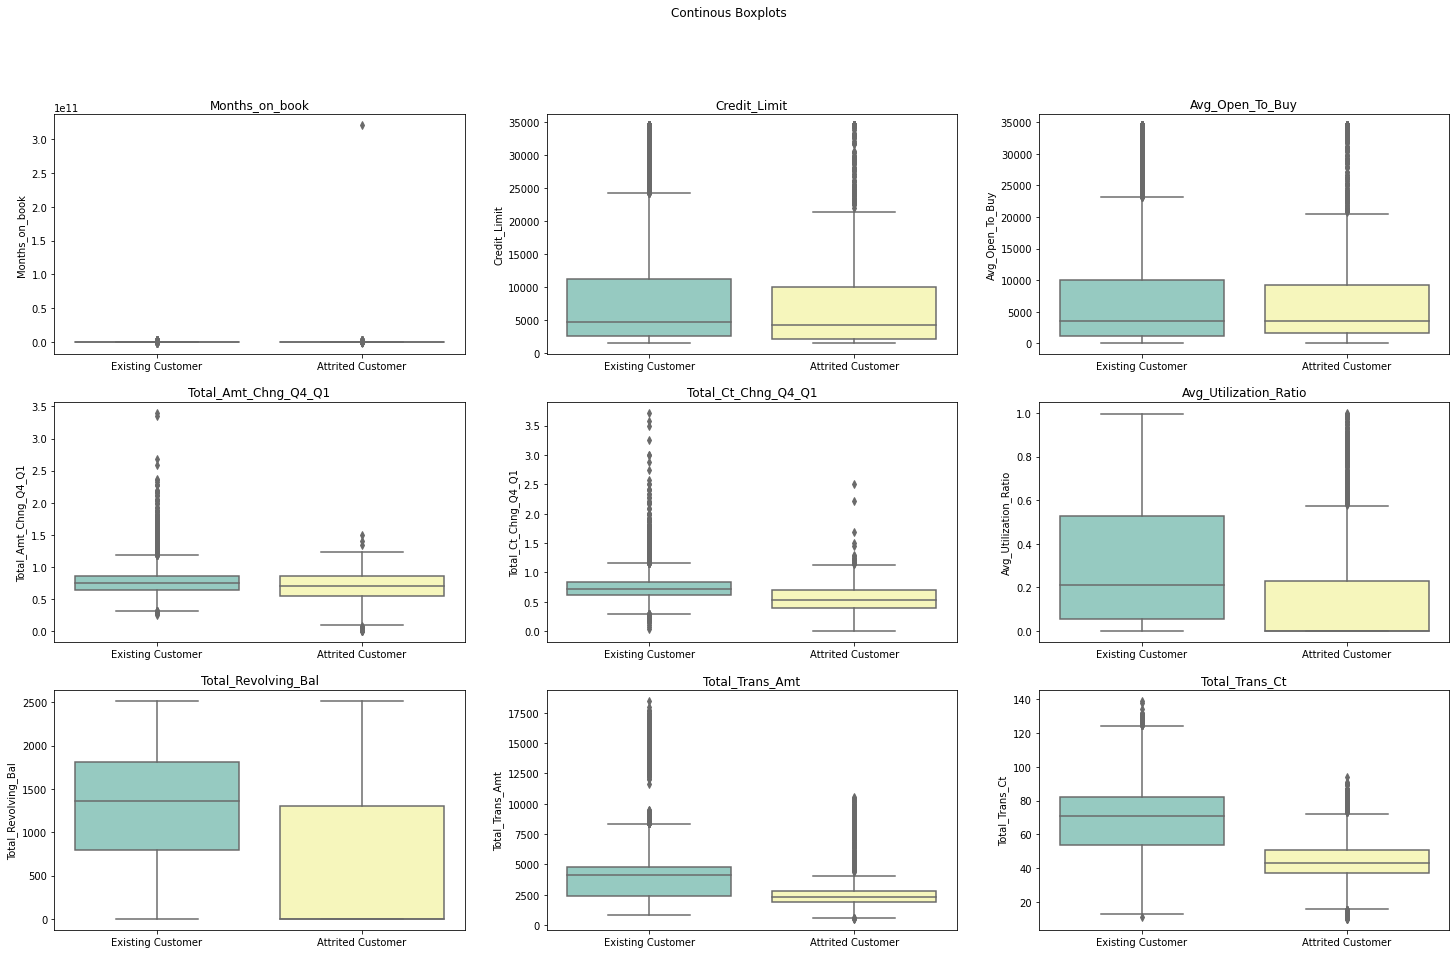

In [8]:


figure, axes = plt.subplots(nrows=3, ncols=3, figsize = (25,15))
figure.suptitle('Continous Boxplots')
axes = axes.flatten()
for ax, catplot in zip(axes,continous_features):
  sns.boxplot(x = 'Attrition_Flag',y = catplot, data = data, ax = ax, palette="Set3").set(title =catplot,xlabel='')

plt.show()


plt.show()

All of the continous variables will need to be scaled to deal with the varying magnitudes 

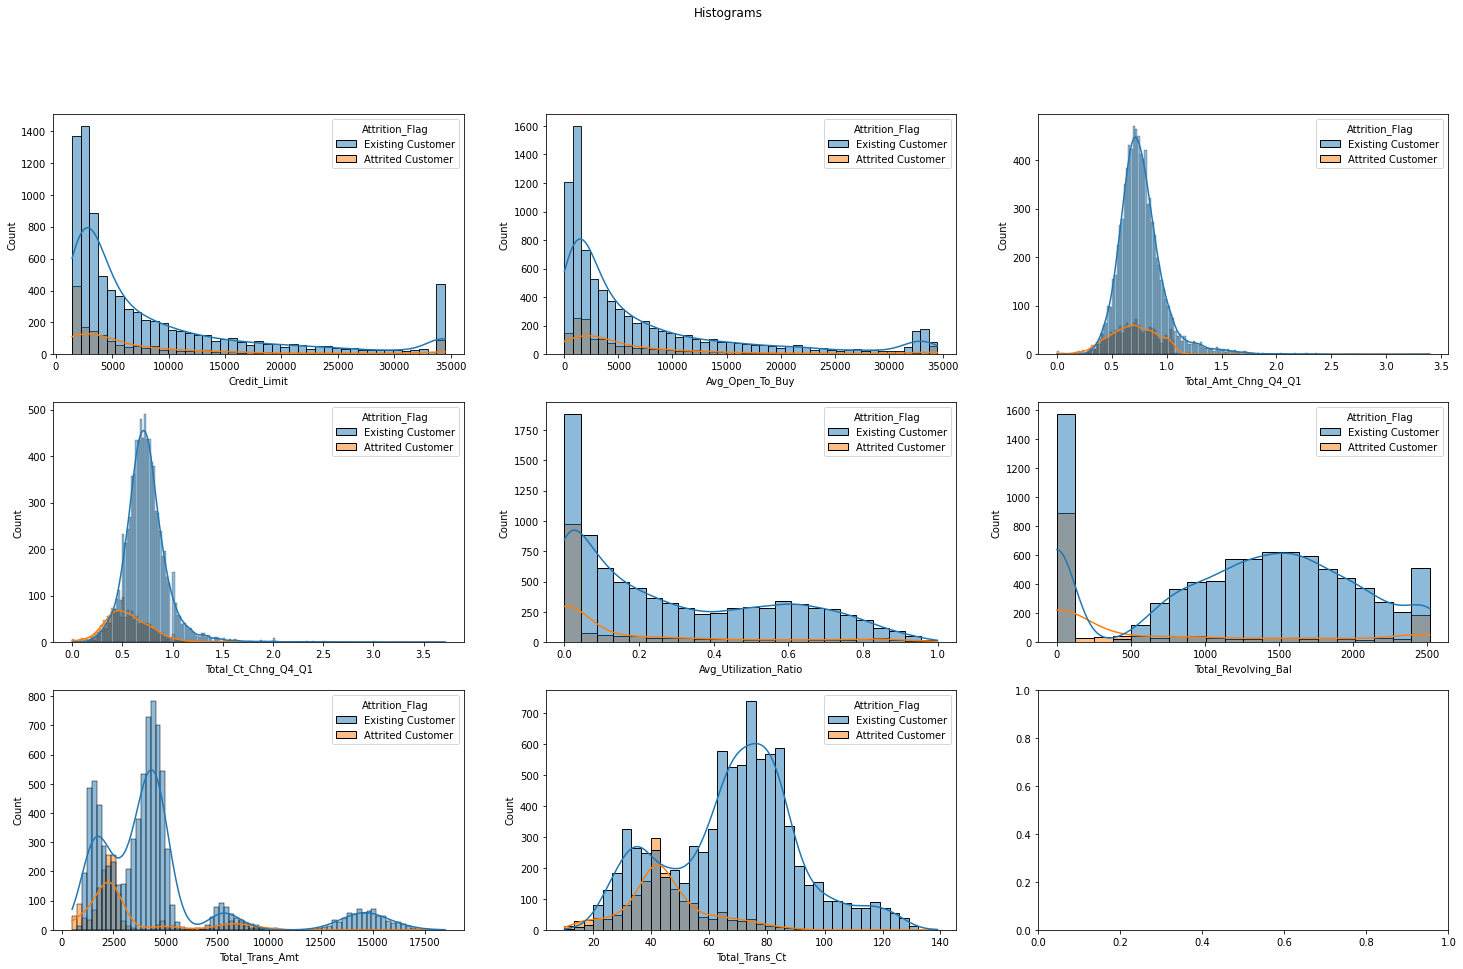

In [9]:
continous_features1 = continous_features[1:]
figure, axes = plt.subplots(nrows=3, ncols=3, figsize = (25,15))
figure.suptitle('Histograms')



sns.histplot(ax =axes[0][0],data=data, x=continous_features1[0],hue='Attrition_Flag', color="skyblue", label =continous_features1[0], kde=True)
sns.histplot(ax =axes[0][1],data=data, x=continous_features1[1],hue='Attrition_Flag', color="skyblue", label=continous_features1[1], kde=True)
sns.histplot(ax =axes[0][2],data=data, x=continous_features1[2],hue='Attrition_Flag', color="skyblue", label=continous_features1[2], kde=True)
sns.histplot(ax =axes[1][0],data=data, x=continous_features1[3],hue='Attrition_Flag', color="skyblue", label=continous_features1[3], kde=True)
sns.histplot(ax =axes[1][1],data=data, x=continous_features1[4],hue='Attrition_Flag', color="skyblue", label=continous_features1[4], kde=True)
sns.histplot(ax =axes[1][2],data=data, x=continous_features1[5],hue='Attrition_Flag', color="skyblue", label=continous_features1[5], kde=True)
sns.histplot(ax =axes[2][0],data=data, x=continous_features1[6],hue='Attrition_Flag', color="skyblue", label=continous_features1[6], kde=True)
sns.histplot(ax =axes[2][1],data=data, x=continous_features1[7],hue='Attrition_Flag', color="skyblue", label=continous_features1[7], kde=True)
plt.show()



From the scatter plot we indentify that Credit_Limit and Avg_Open_To_Buy are high correlated (Avg_Open_To_Buy will be dropped while running models)

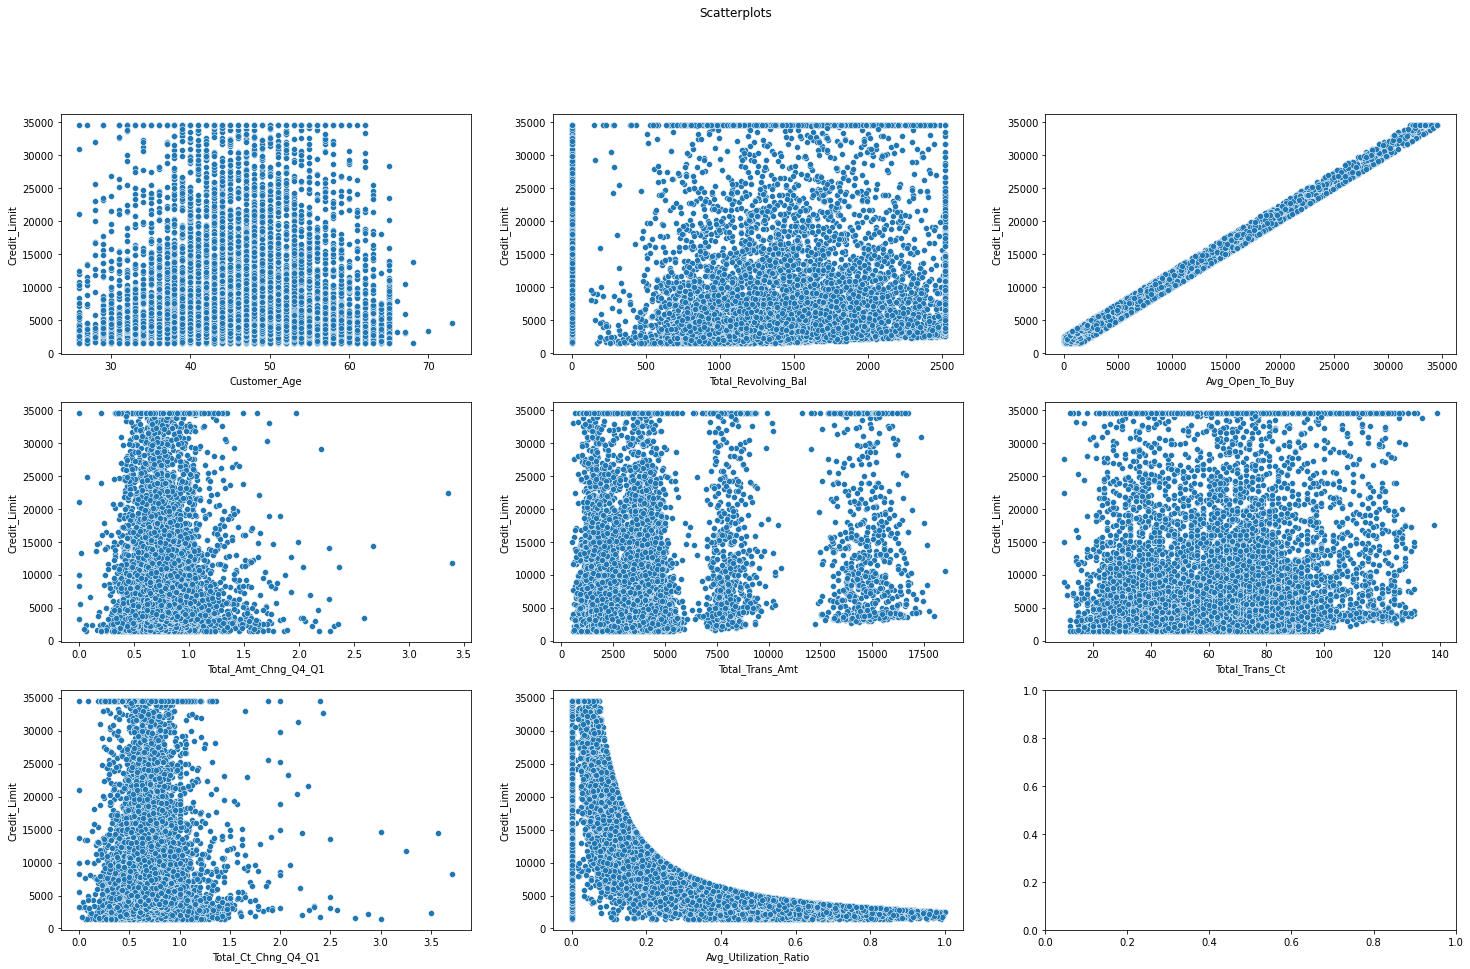

In [10]:

figure, axes = plt.subplots(nrows=3, ncols=3, figsize = (25,15))
figure.suptitle('Scatterplots')


sns.scatterplot(ax = axes[0,0],y='Credit_Limit',x ='Customer_Age', data= data )
sns.scatterplot(ax = axes[0,1],y='Credit_Limit',x ='Total_Revolving_Bal', data= data)
sns.scatterplot(ax = axes[0,2],y='Credit_Limit',x ='Avg_Open_To_Buy', data= data)
sns.scatterplot(ax = axes[1,0],y='Credit_Limit',x ='Total_Amt_Chng_Q4_Q1', data= data)
sns.scatterplot(ax = axes[1,1],y='Credit_Limit',x ='Total_Trans_Amt', data= data)
sns.scatterplot(ax = axes[1,2],y='Credit_Limit',x ='Total_Trans_Ct', data= data)
sns.scatterplot(ax = axes[2,0],y='Credit_Limit',x ='Total_Ct_Chng_Q4_Q1', data= data)
sns.scatterplot(ax = axes[2,1],y='Credit_Limit',x ='Avg_Utilization_Ratio', data= data)

plt.show()

# Categorical Features Analysis 

Edcuation Level, Matrial_Status and Income_Category have and unkown attribute. 

--Education_Level the distribution between unkown and uneducated are simliar 

--Martial_Status unkown and divorce follow a similiar distribution 

it's possible to combine both of this into one attribute (will be dealt with later)

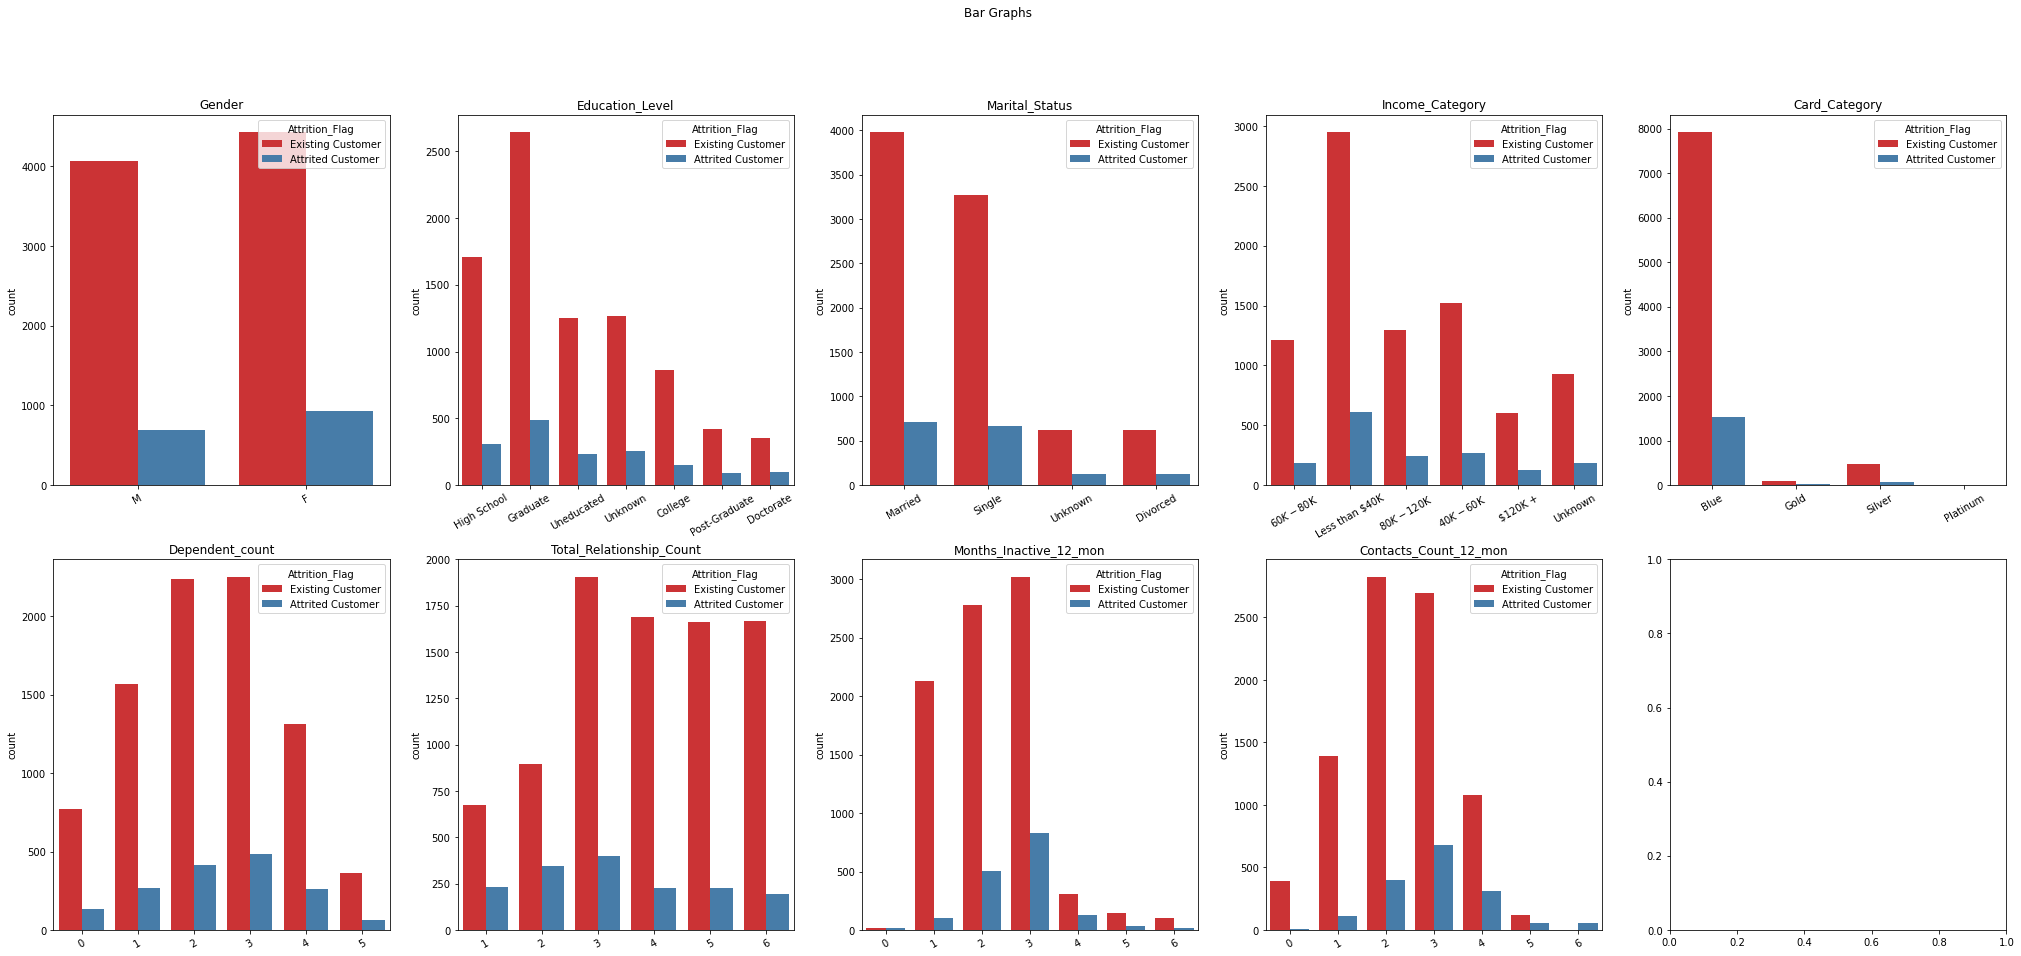

In [11]:

figure, axes = plt.subplots(nrows=2, ncols=5, figsize = (35,15))
figure.suptitle('Bar Graphs')
axes = axes.flatten()
for ax, catplot in zip(axes,cat_features):

 
  g=sns.countplot(x = catplot, data = data,ax = ax,hue='Attrition_Flag', palette="Set1")#.set(title =catplot,xlabel='')
  g.set_xticklabels(g.get_xticklabels(), rotation = 30)
  g.set(title =catplot,xlabel='')
plt.show()

# Target Feature

Attrition_Flag: binary target feature (data is unbalanced)

-- Existing Customer: still with the bank

-- Attrited Customer: no longer with bank

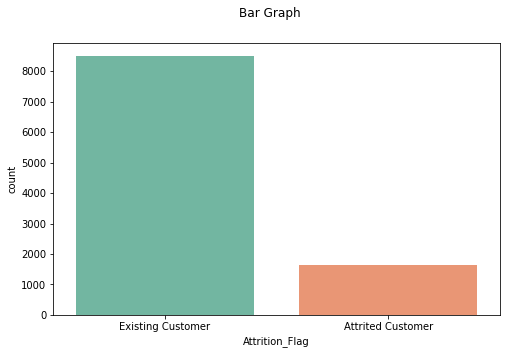

In [28]:

figure, ax = plt.subplots(figsize=(8,5))
sns.countplot(x = 'Attrition_Flag', data = data,ax=ax, palette="Set2")
figure.suptitle('Bar Graph')
plt.show()

In [47]:
from prettytable import PrettyTable

mytable = PrettyTable(["Customer Type","Count", "Percentage"])

mytable.add_row(["Existing Customer",sum(data["Attrition_Flag"] == "Existing Customer"),round((sum(data["Attrition_Flag"] == "Existing Customer")/data.shape[0])*100, 2)])
mytable.add_row(["Attrited Customer",sum(data["Attrition_Flag"] == "Attrited Customer"),round((sum(data["Attrition_Flag"] == "Attrited Customer")/data.shape[0])*100, 2)])
print(mytable)


+-------------------+-------+------------+
|   Customer Type   | Count | Percentage |
+-------------------+-------+------------+
| Existing Customer |  8500 |   83.93    |
| Attrited Customer |  1627 |   16.07    |
+-------------------+-------+------------+


In [14]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
prettytable==2.1.0
pandas==0.25.1
numpy==1.17.2
missingno==0.4.2
matplotlib==3.1.1
